In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.shape

(1338, 7)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\ankur\AppData\Local\Temp\ipykernel_20584\1848874880.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


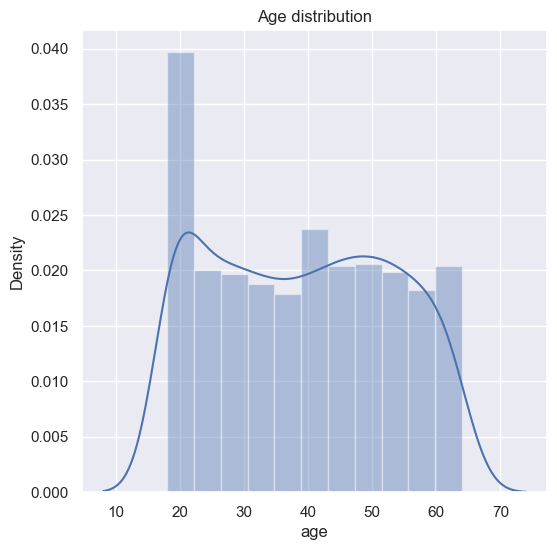

In [8]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age distribution')
plt.show()

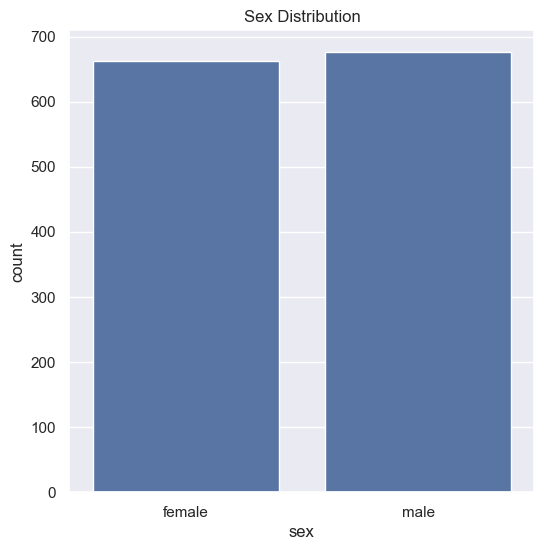

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=df)
plt.title("Sex Distribution")
plt.show()

In [10]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\ankur\AppData\Local\Temp\ipykernel_20584\388080848.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bmi"])


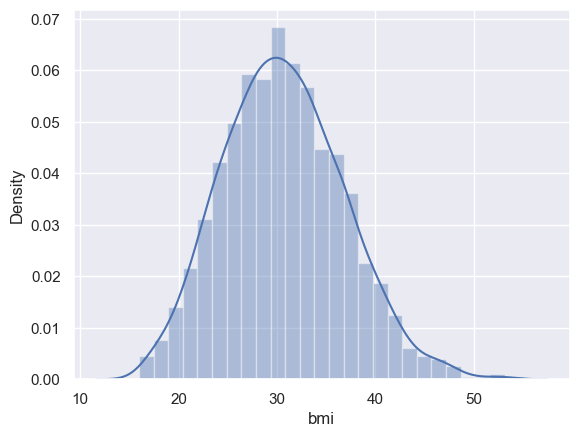

In [11]:
sns.distplot(df["bmi"])
plt.show()

In [12]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [13]:
df.replace({'sex':{'male':0, 'female':1}}, inplace=True)

C:\Users\ankur\AppData\Local\Temp\ipykernel_20584\4039870765.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':0, 'female':1}}, inplace=True)


In [14]:
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

C:\Users\ankur\AppData\Local\Temp\ipykernel_20584\4007427078.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)


In [15]:
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

C:\Users\ankur\AppData\Local\Temp\ipykernel_20584\234505671.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)


In [16]:
X = df.drop(columns='charges', axis=1)

In [17]:
y = df['charges']

In [18]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [19]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [21]:
X_train.shape

(1070, 6)

In [22]:
X_test.shape

(268, 6)

In [23]:
reg = LinearRegression()

In [24]:
reg.fit(X_train,y_train)

LinearRegression()

In [25]:
training_data_prediction = reg.predict(X_train)

In [26]:
r2_train = metrics.r2_score(y_train,training_data_prediction)

In [27]:
r2_train

0.7408025456978804

In [28]:
test_data_prediction = reg.predict(X_test)

In [29]:
r2_test=metrics.r2_score(y_test,test_data_prediction)

In [30]:
r2_test

0.7863983468990001

In [31]:
sample_input_data = (30,1,25,0,1,0)

In [32]:
input_data_as_numpy_array = np.asarray(sample_input_data)

In [33]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [34]:
prediction = reg.predict(input_data_reshaped)

C:\Users\ankur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
print("The insurance cost is : ", prediction)

The insurance cost is :  [3373.90568433]
